In [1]:
from catboost import CatBoostClassifier as CBC
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve
from sklearn import preprocessing
from scipy import stats
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.linear_model  import LogisticRegression as LR
from sklearn.svm import SVC

%matplotlib inline

In [2]:
def make_common_dataframe(df_count):
    dfs_list = []
    dfs_rows_len_list = []
    for i in range(1, df_count + 1):
        df = pd.read_csv(".\\_datasets\\60s\\bt_rolling_dataset_" + str(i) + ".csv")
        df = df.drop(['timestamp'], axis = 1)
        df = (df - df.min()) / (df.max() - df.min())
        df['user'] = i
        dfs_list.append(df)
        dfs_rows_len_list.append(df.shape[0])
    
    mult_coefs = []
    max_shape = max(dfs_rows_len_list)
    
    
    for len_ in dfs_rows_len_list:
        if len_ == 0:
            mult_coefs.append(0)
        else:
            mult_coefs.append(int(max_shape / len_))
        
    concat_list = []
    for df, coef in zip(dfs_list, mult_coefs):
        for i in range(coef):
            concat_list.append(df)
            
    df = pd.concat(concat_list, ignore_index = True)
    return df

In [25]:
df_ = make_common_dataframe(7)

D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [4]:
# df_.loc[df_['user'] != 3, 'user'] = 0

In [5]:
# df_.loc[df_['user'] == 3, 'user'] = 1

In [26]:
df_ = df_.dropna(how='all')

In [27]:
df_.columns.to_list()

['acceleration_count_speed_mean_1_mad',
 'acceleration_count_speed_mean_1_mean',
 'acceleration_count_speed_mean_1_skew',
 'acceleration_count_speed_mean_2_mad',
 'acceleration_count_speed_mean_2_mean',
 'acceleration_count_speed_mean_2_skew',
 'acceleration_count_speed_mean_3_mad',
 'acceleration_count_speed_mean_3_mean',
 'acceleration_count_speed_mean_3_skew',
 'acceleration_count_speed_mean_mean_mad',
 'acceleration_count_speed_mean_mean_mean',
 'acceleration_count_speed_mean_mean_skew',
 'acceleration_count_speed_mean_median_mad',
 'acceleration_count_speed_mean_median_mean',
 'acceleration_count_speed_mean_median_skew',
 'acceleration_count_speed_mean_var_mad',
 'acceleration_count_speed_mean_var_mean',
 'acceleration_count_speed_mean_var_skew',
 'acceleration_disappeared_devices_count_mean_1_mad',
 'acceleration_disappeared_devices_count_mean_1_mean',
 'acceleration_disappeared_devices_count_mean_1_skew',
 'acceleration_disappeared_devices_count_mean_2_mad',
 'acceleration_disap

In [28]:
features = [
 'acceleration_count_speed_mean_mean_mad',
 'acceleration_count_speed_mean_mean_mean',
 'acceleration_count_speed_mean_mean_skew',
 'acceleration_count_speed_mean_median_mad',
 'acceleration_count_speed_mean_median_mean',
 'acceleration_count_speed_mean_median_skew',
 'acceleration_count_speed_mean_var_mad',
 'acceleration_count_speed_mean_var_mean',
 'acceleration_count_speed_mean_var_skew',
 'acceleration_disappeared_devices_count_mean_mean_mad',
 'acceleration_disappeared_devices_count_mean_mean_mean',
 'acceleration_disappeared_devices_count_mean_mean_skew',
 'acceleration_disappeared_devices_count_mean_median_mad',
 'acceleration_disappeared_devices_count_mean_median_mean',
 'acceleration_disappeared_devices_count_mean_median_skew',
 'acceleration_disappeared_devices_count_mean_var_mad',
 'acceleration_disappeared_devices_count_mean_var_mean',
 'acceleration_disappeared_devices_count_mean_var_skew',
 'acceleration_jaccard_index_mean_mean_mad',
 'acceleration_jaccard_index_mean_mean_mean',
 'acceleration_jaccard_index_mean_mean_skew',
 'acceleration_jaccard_index_mean_median_mad',
 'acceleration_jaccard_index_mean_median_mean',
 'acceleration_jaccard_index_mean_median_skew',
 'acceleration_jaccard_index_mean_var_mad',
 'acceleration_jaccard_index_mean_var_mean',
 'acceleration_jaccard_index_mean_var_skew',
 'acceleration_occur_speed_mean_mean_mad',
 'acceleration_occur_speed_mean_mean_mean',
 'acceleration_occur_speed_mean_mean_skew',
 'acceleration_occur_speed_mean_median_mad',
 'acceleration_occur_speed_mean_median_mean',
 'acceleration_occur_speed_mean_median_skew',
 'acceleration_occur_speed_mean_var_mad',
 'acceleration_occur_speed_mean_var_mean',
 'acceleration_occur_speed_mean_var_skew',
 'acceleration_occured_devices_count_mean_mean_mad',
 'acceleration_occured_devices_count_mean_mean_mean',
 'acceleration_occured_devices_count_mean_mean_skew',
 'acceleration_occured_devices_count_mean_median_mad',
 'acceleration_occured_devices_count_mean_median_mean',
 'acceleration_occured_devices_count_mean_median_skew',
 'acceleration_occured_devices_count_mean_var_mad',
 'acceleration_occured_devices_count_mean_var_mean',
 'acceleration_occured_devices_count_mean_var_skew',
 'count_kurt',
 'count_mean',
 'count_median',
 'count_skew',
 'count_speed_mean_mad',
 'count_speed_mean_mean',
 'count_speed_mean_skew',
 'count_speed_median_mad',
 'count_speed_median_mean',
 'count_speed_median_skew',
 'count_speed_var_mad',
 'count_speed_var_mean',
 'count_speed_var_skew',
 'count_var',
 'disappeared_devices_count_mean_kurt',
 'disappeared_devices_count_mean_mad',
 'disappeared_devices_count_mean_mean',
 'disappeared_devices_count_mean_median',
 'disappeared_devices_count_mean_skew',
 'disappeared_devices_count_mean_var',
 'disappeared_devices_count_median_mad',
 'disappeared_devices_count_median_mean',
 'disappeared_devices_count_median_skew',
 'disappeared_devices_count_var_mad',
 'disappeared_devices_count_var_mean',
 'disappeared_devices_count_var_skew',
 'jaccard_index_1_mad',
 'jaccard_index_1_mean',
 'jaccard_index_1_skew',
 'jaccard_index_2_mad',
 'jaccard_index_2_mean',
 'jaccard_index_2_skew',
 'jaccard_index_3_mad',
 'jaccard_index_3_mean',
 'jaccard_index_3_skew',
 'jaccard_index_mean_mad',
 'jaccard_index_mean_mean',
 'jaccard_index_mean_skew',
 'jaccard_index_median_mad',
 'jaccard_index_median_mean',
 'jaccard_index_median_skew',
 'jaccard_index_var_mad',
 'jaccard_index_var_mean',
 'jaccard_index_var_skew',
 'le_connectable_kurt',
 'le_connectable_mean',
 'le_connectable_median',
 'le_connectable_skew',
 'le_connectable_var',
 'le_level_kurt',
 'le_level_mean',
 'le_level_median',
 'le_level_skew',
 'le_level_var',
 'occur_speed_mean_mad',
 'occur_speed_mean_mean',
 'occur_speed_mean_skew',
 'occur_speed_median_mad',
 'occur_speed_median_mean',
 'occur_speed_median_skew',
 'occur_speed_var_mad',
 'occur_speed_var_mean',
 'occur_speed_var_skew',
 'occured_devices_count_mean_kurt',
 'occured_devices_count_mean_mad',
 'occured_devices_count_mean_mean',
 'occured_devices_count_mean_median',
 'occured_devices_count_mean_skew',
 'occured_devices_count_mean_var',
 'occured_devices_count_median_kurt',
 'occured_devices_count_median_mad',
 'occured_devices_count_median_mean',
 'occured_devices_count_median_median',
 'occured_devices_count_median_skew',
 'occured_devices_count_median_var',
 'occured_devices_count_var_kurt',
 'occured_devices_count_var_mad',
 'occured_devices_count_var_mean',
 'occured_devices_count_var_median',
 'occured_devices_count_var_skew',
 'occured_devices_count_var_var',
 'user']

In [29]:
df_ = df_.drop(df_.columns.difference(features), axis = 1)

In [30]:
# df_ = (df_ - df_.min()) / (df_.max() - df_.min())

In [33]:
df = pd.read_csv(".\\_datasets\\60s\\bt_rolling_dataset_" + str(1) + ".csv")

In [36]:
df.columns.to_list()

['timestamp',
 'count_mean',
 'count_var',
 'count_median',
 'count_skew',
 'count_kurt',
 'one_hot_c_1280_mean',
 'one_hot_c_1280_var',
 'one_hot_c_1280_median',
 'one_hot_c_1280_skew',
 'one_hot_c_1280_kurt',
 'one_hot_c_1536_mean',
 'one_hot_c_1536_var',
 'one_hot_c_1536_median',
 'one_hot_c_1536_skew',
 'one_hot_c_1536_kurt',
 'one_hot_c_7936_mean',
 'one_hot_c_7936_var',
 'one_hot_c_7936_median',
 'one_hot_c_7936_skew',
 'one_hot_c_7936_kurt',
 'one_hot_b_10_mean',
 'one_hot_b_10_var',
 'one_hot_b_10_median',
 'one_hot_b_10_skew',
 'one_hot_b_10_kurt',
 'one_hot_b_12_mean',
 'one_hot_b_12_var',
 'one_hot_b_12_median',
 'one_hot_b_12_skew',
 'one_hot_b_12_kurt',
 'one_hot_t_1_mean',
 'one_hot_t_1_var',
 'one_hot_t_1_median',
 'one_hot_t_1_skew',
 'one_hot_t_1_kurt',
 'one_hot_t_2_mean',
 'one_hot_t_2_var',
 'one_hot_t_2_median',
 'one_hot_t_2_skew',
 'one_hot_t_2_kurt',
 'one_hot_t_3_mean',
 'one_hot_t_3_var',
 'one_hot_t_3_median',
 'one_hot_t_3_skew',
 'one_hot_t_3_kurt',
 'le_co

In [31]:
df_.fillna(-100)

,acceleration_count_speed_mean_mean_mad,acceleration_count_speed_mean_mean_mean,acceleration_count_speed_mean_mean_skew,acceleration_count_speed_mean_median_mad,acceleration_count_speed_mean_median_mean,acceleration_count_speed_mean_median_skew,acceleration_count_speed_mean_var_mad,acceleration_count_speed_mean_var_mean,acceleration_count_speed_mean_var_skew,acceleration_disappeared_devices_count_mean_mean_mad,...,occured_devices_count_median_median,occured_devices_count_median_skew,occured_devices_count_median_var,occured_devices_count_var_kurt,occured_devices_count_var_mad,occured_devices_count_var_mean,occured_devices_count_var_median,occured_devices_count_var_skew,occured_devices_count_var_var,user
0,0.304532,0.778367,0.510364,0.347106,0.825100,0.421754,0.028255,0.035178,0.425882,0.485645,...,-100.0,0.381660,-100.000000,-100.000000,0.768707,0.561905,-100.0,4.132567e-01,-100.000000,1
1,0.340313,0.761021,0.508236,0.363834,0.814419,0.420249,0.029340,0.034592,0.412043,0.485645,...,-100.0,0.381660,-100.000000,-100.000000,0.768707,0.561905,-100.0,4.132567e-01,-100.000000,1
2,0.337662,0.730185,0.533564,0.324454,0.741433,0.504157,0.024600,0.035861,0.418919,0.446328,...,-100.0,0.359393,-100.000000,-100.000000,0.722222,0.666667,-100.0,3.551790e-01,-100.000000,1
3,0.250000,0.684654,0.409722,0.221995,0.666667,0.405791,0.025338,0.035348,0.437552,0.406780,...,-100.0,0.402609,-100.000000,-100.000000,0.750000,0.650000,-100.0,3.684034e-01,-100.000000,1
4,0.227273,0.696459,0.433439,0.204918,0.679128,0.440311,0.026486,0.034551,0.464232,0.440678,...,-100.0,0.407928,-100.000000,-100.000000,0.740741,0.655556,-100.0,3.746519e-01,-100.000000,1
5,0.279221,0.723440,0.491617,0.213456,0.685358,0.467574,0.017343,0.030795,0.472794,0.414313,...,-100.0,0.105454,-100.000000,-100.000000,0.635802,0.477778,-100.0,5.142980e-01,-100.000000,1
6,0.279221,0.753794,0.376539,0.227687,0.716511,0.367318,0.015129,0.029770,0.361238,0.369115,...,-100.0,0.105454,-100.000000,-100.000000,0.388889,0.366667,-100.0,5.315669e-01,-100.000000,1
7,0.266234,0.758853,0.385147,0.239071,0.710280,0.357977,0.014678,0.035576,0.538380,0.640301,...,-100.0,0.271834,-100.000000,-100.000000,0.268519,0.216667,-100.0,4.624535e-01,-100.000000,1
8,0.255411,0.750422,0.404274,0.227687,0.697819,0.383686,0.015375,0.036714,0.455766,0.587571,...,-100.0,0.404789,-100.000000,-100.000000,0.555556,0.366667,-100.0,6.096041e-01,-100.000000,1
9,0.236947,0.742231,0.439569,0.221646,0.680908,0.442363,0.015573,0.035422,0.507519,0.553442,...,-100.0,0.345017,-100.000000,-100.000000,0.621315,0.442857,-100.0,5.039823e-01,-100.000000,1


In [16]:
df_ = df_.dropna()

In [17]:
def drop_bad_cols(df):
    bad_cols = []
    for col in df.columns:
        if df[df[col] != df[col].mean()].shape[0] < 0.1 * df.shape[0]:
            bad_cols.append(col)

    df.drop(bad_cols, axis=1, inplace=True)
    df = df[[x for x in map(np.all, np.abs(df.apply(stats.zscore).fillna(0).to_numpy()) < 3)]]
    return df

In [18]:
df = df_.to_numpy()

In [19]:
np.random.shuffle(df)

In [20]:
X = df[:, :-1]
y = df[:, -1:]

In [21]:
t = int(X.shape[0] * 2 / 3)

In [22]:
X_train = X[:t]
X_test = X[t:]
y_train = y[:t]
y_test = y[t:]

In [23]:
model = CBC(iterations = 50, depth = 6)

In [24]:
model.fit(X_train, y_train)

CatBoostError: Labels variable is empty.

In [32]:
preds_class = model.predict(X_test)

In [33]:
preds_class

array([[4.],
       [1.],
       [4.],
       ...,
       [5.],
       [3.],
       [3.]])

In [34]:
accuracy_score(preds_class, y_test)

0.9999638192409277

In [35]:
plot_roc_curve(model, X_test, y_test)

ValueError: CatBoostClassifier should be a binary classifier

In [36]:
sum_ = 0
imp = [ (x, i) for x, i in zip(model.feature_importances_, range(len(model.feature_importances_)) )]
sorted_ = sorted(imp, key=lambda tup: tup[0])
for i in range(len(sorted_)):
    if sorted_[i][0] > 5:
        print(sorted_[i][1], ': ', df_.columns[sorted_[i][1]], ' - ', sorted_[i][0])

209 :  occured_devices_count_mean_median  -  5.4229268954721475
203 :  occured_devices_count_3_median  -  16.039690011868398
192 :  occured_devices_count_1_median  -  22.611057413578326
166 :  le_level_kurt  -  28.316449253935946


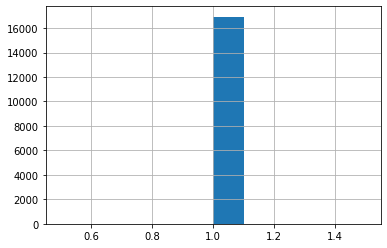

In [58]:
df_.loc[df_.user == 3, 'occured_devices_count_mean_median'].hist()

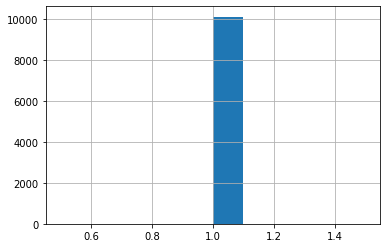

In [59]:
df_.loc[df_.user == 1, 'occured_devices_count_mean_median'].hist()

In [ ]:
df_.loc[df_.user == 1, 'acceleration_count_speed_mean_mean_mean'].var()

In [ ]:
tree = DTC()
tree.fit(X_train, y_train)
prediction = tree.predict(X_test)

In [ ]:
accuracy_score(prediction, y_test)

In [ ]:
lr = LR(max_iter = 1000)
lr.fit(X_train, y_train.reshape(y_train.shape[0], ))

In [ ]:
accuracy_score(lr.predict(X_test), y_test)

In [ ]:
mod = SVC()
mod.fit(X_train, y_train.reshape(y_train.shape[0], ))

In [ ]:
accuracy_score(mod.predict(X_test), y_test)

In [ ]:
lr.coef_